In [1]:
import pandas as pd
import numpy as np
import acquire

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('big_df.csv', index_col=0)
df.shape

(913000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_date      913000 non-null  object 
 2   sale_id        913000 non-null  int64  
 3   store_address  913000 non-null  object 
 4   store_city     913000 non-null  object 
 5   store_id       913000 non-null  int64  
 6   store_state    913000 non-null  object 
 7   store_zipcode  913000 non-null  int64  
 8   item_brand     913000 non-null  object 
 9   item_id        913000 non-null  int64  
 10  item_name      913000 non-null  object 
 11  item_price     913000 non-null  float64
 12  item_upc12     913000 non-null  int64  
 13  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


The end result of this exercise should be a file named `prepare.py`.

Using your store items data:

1. Convert date column to datetime format.

In [9]:
df.sale_date.dtypes

dtype('O')

In [10]:
df.sale_date = pd.to_datetime(df.sale_date)

In [11]:
df.head(2)

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,2013-01-01 00:00:00+00:00,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,2013-01-02 00:00:00+00:00,2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


2. Plot the distribution of `sale_amount` and `item_price`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd90d384850>,
      dtype=object)

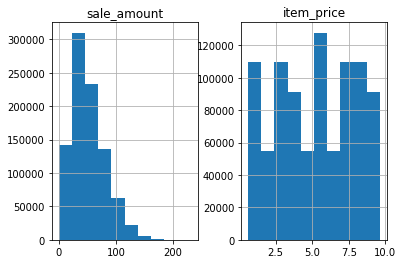

In [51]:
def plot_store_dist():
    df[['sale_amount', 'item_price']].hist()

3. Set the index to be the datetime variable.

In [35]:
date_df = df.set_index("sale_date").sort_index()
date_df.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


4. Add a 'month' and 'day of week' column to your dataframe.

In [39]:
date_df['month'] = date_df.index.month
date_df['day_of_week'] = date_df.index.day_name()
date_df[['month', 'day_of_week']].head()

,month,day_of_week
sale_date,,
2013-01-01 00:00:00+00:00,1,Tuesday
2013-01-01 00:00:00+00:00,1,Tuesday
2013-01-01 00:00:00+00:00,1,Tuesday
2013-01-01 00:00:00+00:00,1,Tuesday
2013-01-01 00:00:00+00:00,1,Tuesday


5. Add a column to your dataframe, `sales_total`, which is a derived from `sale_amount` (total items) and `item_price`.

In [41]:
date_df['sales_total'] = date_df.sale_amount * date_df.item_price
date_df[['sales_total']]

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,10.92
2013-01-01 00:00:00+00:00,218.40
2013-01-01 00:00:00+00:00,125.55
2013-01-01 00:00:00+00:00,453.60
2013-01-01 00:00:00+00:00,294.00
...,...
2017-12-31 00:00:00+00:00,87.57
2017-12-31 00:00:00+00:00,133.44
2017-12-31 00:00:00+00:00,285.45


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
def prep_store():
    # acquires store data from local csv (see acquire.py)
    df = pd.read_csv('big_df.csv', index_col=0)
    # sets sale_date to a datetime datatype
    df.sale_date = pd.to_datetime(df.sale_date)
    # sets the index to the date for each observation
    df = df.set_index("sale_date").sort_index()
    # add month and day_of_week columns to the dataframe
    df['month'] = df.index.month
    df['day_of_week'] = df.index.day_name()
    # add sales_total column by multiplying sale_amount and item_price
    df['sales_total'] = df.sale_amount * df.item_price
    return df

Using the OPS data acquired in the Acquire exercises `opsd_germany_daily.csv`, complete the following:

In [96]:
ogd = pd.read_csv('opsd_germany_daily.csv', index_col=0)
ogd.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


1. Convert date column to datetime format.

In [97]:
ogd.Date = pd.to_datetime(ogd.Date)
ogd.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

2. Plot the distribution of each of your variables.

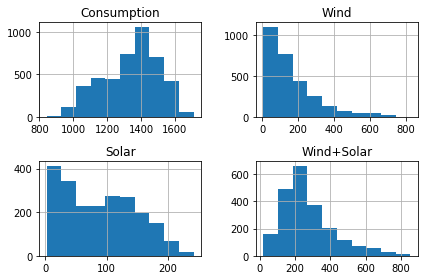

In [98]:
def plot_ogd_dist():
    ogd.hist()
    plt.tight_layout()

3. Set the index to be the datetime variable.

In [99]:
ogd = ogd.set_index('Date').sort_index()
ogd.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


4. Add a month and a year column to your dataframe.

In [100]:
ogd['month'] = ogd.index.month
ogd['year'] = ogd.index.year
ogd.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


5. Fill any missing values.

In [105]:
ogd[['Solar', 'Wind']] = ogd[['Solar', 'Wind']].fillna(0)

In [107]:
ogd['Wind+Solar'] = ogd.Wind + ogd.Solar

In [108]:
ogd.isnull().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64

In [109]:
ogd.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
def prep_ogd():
    # acquires opsd_german_daily data from local csv (see acquire.py)
    ogd = pd.read_csv('opsd_germany_daily.csv', index_col=0)
    # sets Date to a datetime datatype
    ogd.Date = pd.to_datetime(ogd.Date)
    # sets the index to the date for each observation
    ogd = ogd.set_index('Date').sort_index()
    # add month and year columns to the dataframe
    ogd['month'] = ogd.index.month
    ogd['year'] = ogd.index.year
    # Fill missing values:
    # change Solar and Wind Columns to 0
    ogd[['Solar', 'Wind']] = ogd[['Solar', 'Wind']].fillna(0)
    # add the Wind and Solar Columns together to get actual values
    ogd['Wind+Solar'] = ogd.Wind + ogd.Solar
    return ogd

### Check Functions

In [2]:
import prepare

In [3]:
prepare.prep_store().head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


In [4]:
prepare.prep_ogd().head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


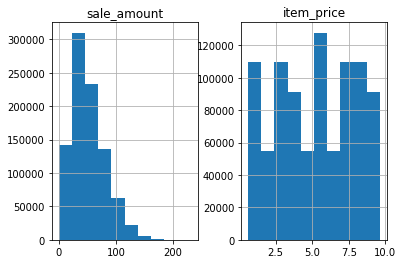

In [5]:
prepare.plot_store_dist()

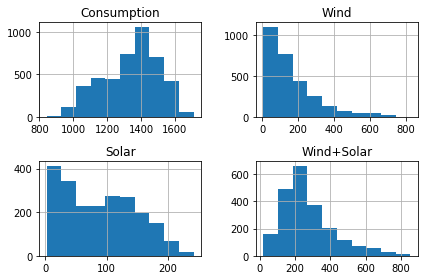

In [6]:
prepare.plot_ogd_dist()